In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [39]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [40]:
df.Balance

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [41]:
zero_values = df[df['Balance']==0.00]
total_entries = len(df)
zero_values_count = len(zero_values)
percentage_zero = (zero_values_count/total_entries)*100
print(f"Number of 0.00 values: {zero_values_count}")
print(f"Percentage of 0.00 values: {percentage_zero:.2f}%")

Number of 0.00 values: 3617
Percentage of 0.00 values: 36.17%


In [42]:
df['ZeroBalance'] = df['Balance'] == 0.00

In [43]:
#impute 0.00 values
mean_balance = df[df['Balance'] != 0.00]['Balance'].mean()
df['Balance'] = df['Balance'].replace(0.00, mean_balance)


In [44]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
#one hot encoding

In [45]:
df.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ZeroBalance,Geography_Germany,Geography_Spain,Gender_Male
3710,3711,15601796,Chizuoke,645,30,1,125739.26,1,1,1,193441.23,0,False,False,False,True
1467,1468,15681843,Barbour,624,35,0,180303.24,2,1,0,163587.90,0,False,True,False,False
9387,9388,15594576,Zhdanov,524,32,1,144875.71,1,0,0,187740.04,0,False,False,False,True
2473,2474,15679249,Chou,351,57,4,163146.46,1,1,0,169621.69,1,False,True,False,False


In [46]:
def print_unique_col_vales(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')
    

In [47]:
print_unique_col_vales(df)

Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']


In [48]:
true_false_col = ['ZeroBalance'	,'Geography_Germany',	'Geography_Spain',	'Gender_Male']
for col in true_false_col:
    if col in df.columns:
        if df[col].dtype == 'bool':
            df[col].replace({True: 1, False: 0}, inplace=True)
        else:
            print(f"{col} does not contain boolean values")
    else:
        print(f"{col} does not exist in the DataFrame")

In [49]:
df.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ZeroBalance,Geography_Germany,Geography_Spain,Gender_Male
7488,7489,15687765,Chukwujamuike,538,42,4,80380.240000,1,1,0,119216.46,0,0,1,0,0
279,280,15782210,K'ung,714,46,1,119827.493793,1,1,0,152167.79,1,1,0,0,1
4333,4334,15748327,Anderson,724,34,6,118235.700000,2,0,0,157137.23,0,0,1,0,1
9718,9719,15704053,T'ang,710,62,3,131078.420000,2,1,0,119348.76,1,0,0,1,1


In [50]:
col_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_scale] = scaler.fit_transform(df[col_scale])

In [51]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Define the features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X, columns=X.columns)

# Verify the scaling
print(X_scaled_df.head())


   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538  0.324324     0.2  0.469628              1          1   
1        0.516  0.310811     0.1  0.323876              1          0   
2        0.304  0.324324     0.8  0.630812              3          1   
3        0.698  0.283784     0.1  0.469628              2          0   
4        1.000  0.337838     0.2  0.492625              1          1   

   IsActiveMember  EstimatedSalary  ZeroBalance  Geography_Germany  \
0               1         0.506735            1                  0   
1               1         0.562709            0                  0   
2               0         0.569654            0                  0   
3               0         0.469120            1                  0   
4               1         0.395400            0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3         

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [54]:
#handling imbalance datasets
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.array([0, 1]),y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.6293266205160478, 1: 2.4330900243309004}


In [55]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [56]:
from tensorflow.keras.layers import Dense, Dropout

In [57]:
X_train.shape

(8000, 12)

In [58]:
import tensorflow as tf
from tensorflow import keras


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model

model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
history = model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, validation_split=0.2)
    


Epoch 1/50


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5643 - loss: 0.7052 - val_accuracy: 0.0851 - val_loss: 0.8929
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6195 - loss: 0.6601 - val_accuracy: 0.1976 - val_loss: 0.8457
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6526 - loss: 0.6421 - val_accuracy: 0.2812 - val_loss: 0.8101
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6673 - loss: 0.6172 - val_accuracy: 0.3328 - val_loss: 0.8244
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.6322 - val_accuracy: 0.2736 - val_loss: 0.8561
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6642 - loss: 0.6257 - val_accuracy: 0.3526 - val_loss: 0.8354
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - loss: 0.6018 - val_accuracy: 0.4407 - val_loss: 0.7882
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7001 - loss: 0.5788 - val_accuracy: 0.4574 - val_loss: 0.8084
Epo

In [60]:
print(X_train.shape) 
print(X_test.shape)

(8000, 12)
(2000, 12)


In [61]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4278
Test Accuracy: 0.81


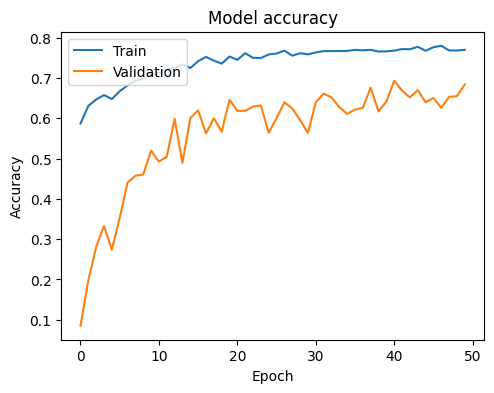

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

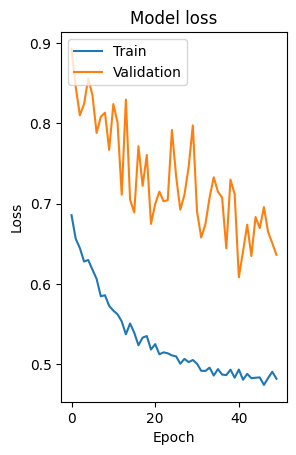

In [63]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [64]:
yp = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [65]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [66]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1607
           1       0.50      0.69      0.58       393

    accuracy                           0.81      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.84      0.81      0.82      2000



Text(95.72222222222221, 0.5, 'Truth')

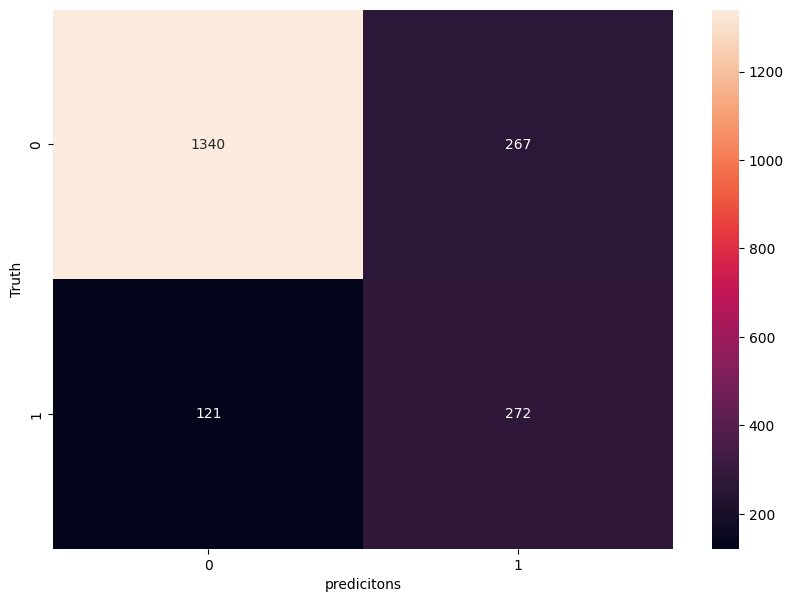

In [68]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True, fmt='d')
plt.xlabel('predicitons')
plt.ylabel('Truth')

In [69]:
#recall for 0 class 
round(1568/(1568+ 241),2)

0.87

In [70]:
round(1568/(1568 + 241),2)

0.87

In [71]:
y_train.value_counts()

Exited
0    6356
1    1644
Name: count, dtype: int64

In [76]:
def ANN(X_train,X_test,y_train,y_test,loss,weights):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
        
        # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        # Train the model
    history = model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, validation_split=0.2)
        
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight = weights)
    
    print(model.evaluate(X_test,y_test))
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print('Classification report : \n', classification_report(y_test,y_preds))
    return y_preds

In [77]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/50


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6066 - loss: 0.6644 - val_accuracy: 0.0957 - val_loss: 0.8631
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.6500 - val_accuracy: 0.1884 - val_loss: 0.8668
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6471 - loss: 0.6326 - val_accuracy: 0.2827 - val_loss: 0.8371
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.6318 - val_accuracy: 0.2964 - val_loss: 0.8737
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6634 - loss: 0.6158 - val_accuracy: 0.3951 - val_loss: 0.8446
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.6069 - val_accuracy: 0.4058 - val_loss: 0.8497
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6878 - loss: 0.6033 - val_accuracy: 0.4331 - val_loss: 0.8290
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 0.5865 - val_accuracy: 0.4422 - val_loss: 0.8391
Epo

In [78]:
y_test.value_counts()

Exited
0    1607
1     393
Name: count, dtype: int64

In [82]:

#class count
count_class_0, count_class_1 = df.Exited.value_counts()
#divide by class
df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]


In [83]:
df_class_0.shape

(7963, 13)

In [84]:
df_class_1.shape

(2037, 13)

In [85]:
#under sampling 
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape
print('Random under-sampling: ')
print(df_test_under.Exited.value_counts())

Random under-sampling: 
Exited
0    2037
1    2037
Name: count, dtype: int64


In [90]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,stratify = y)


In [91]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [92]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/50


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5274 - loss: 0.7144 - val_accuracy: 0.0000e+00 - val_loss: 0.9565
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6101 - loss: 0.6616 - val_accuracy: 0.0851 - val_loss: 0.8881
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6572 - loss: 0.6219 - val_accuracy: 0.2675 - val_loss: 0.8320
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6447 - loss: 0.6295 - val_accuracy: 0.3480 - val_loss: 0.8509
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6608 - loss: 0.6260 - val_accuracy: 0.3906 - val_loss: 0.8508
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6738 - loss: 0.6030 - val_accuracy: 0.3951 - val_loss: 0.8607
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.5913 - val_accuracy: 0.5015 - val_loss: 0.7959
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.5824 - val_accuracy: 0.5182 - val_loss: 0.7757